In proccessData.ipynb, data is processed to get the training data.  
In visualizations.ipynb, visualizations are created to examine the data. The final issue that needs to be resolved is the NaN values in the data.

In [1]:
import sys
sys.path.append('../')
import pandas as pd
from processing.processData import process
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainingData = pd.read_pickle('../../../fulldata/processed/trainingData.pkl')
trainingData = process(trainingData)
trainingSubjectInfo = pd.read_pickle('../../../fulldata/processed/trainingSubjectInfo.pkl')

In [3]:
def nanPercentages(dataframe):
    nancounts = dataframe.query('currentobject == "Zeros"').isna().groupby('st').sum()[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']]
    hitcounts = dataframe.groupby('st').count()[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']]
    percentnan = nancounts/(hitcounts+nancounts)
    percentnan['whole'] = percentnan.apply(lambda x: x.mean(), axis=1)
    percentnan['max'] = percentnan.apply(lambda x: x.max(), axis=1)
    return percentnan

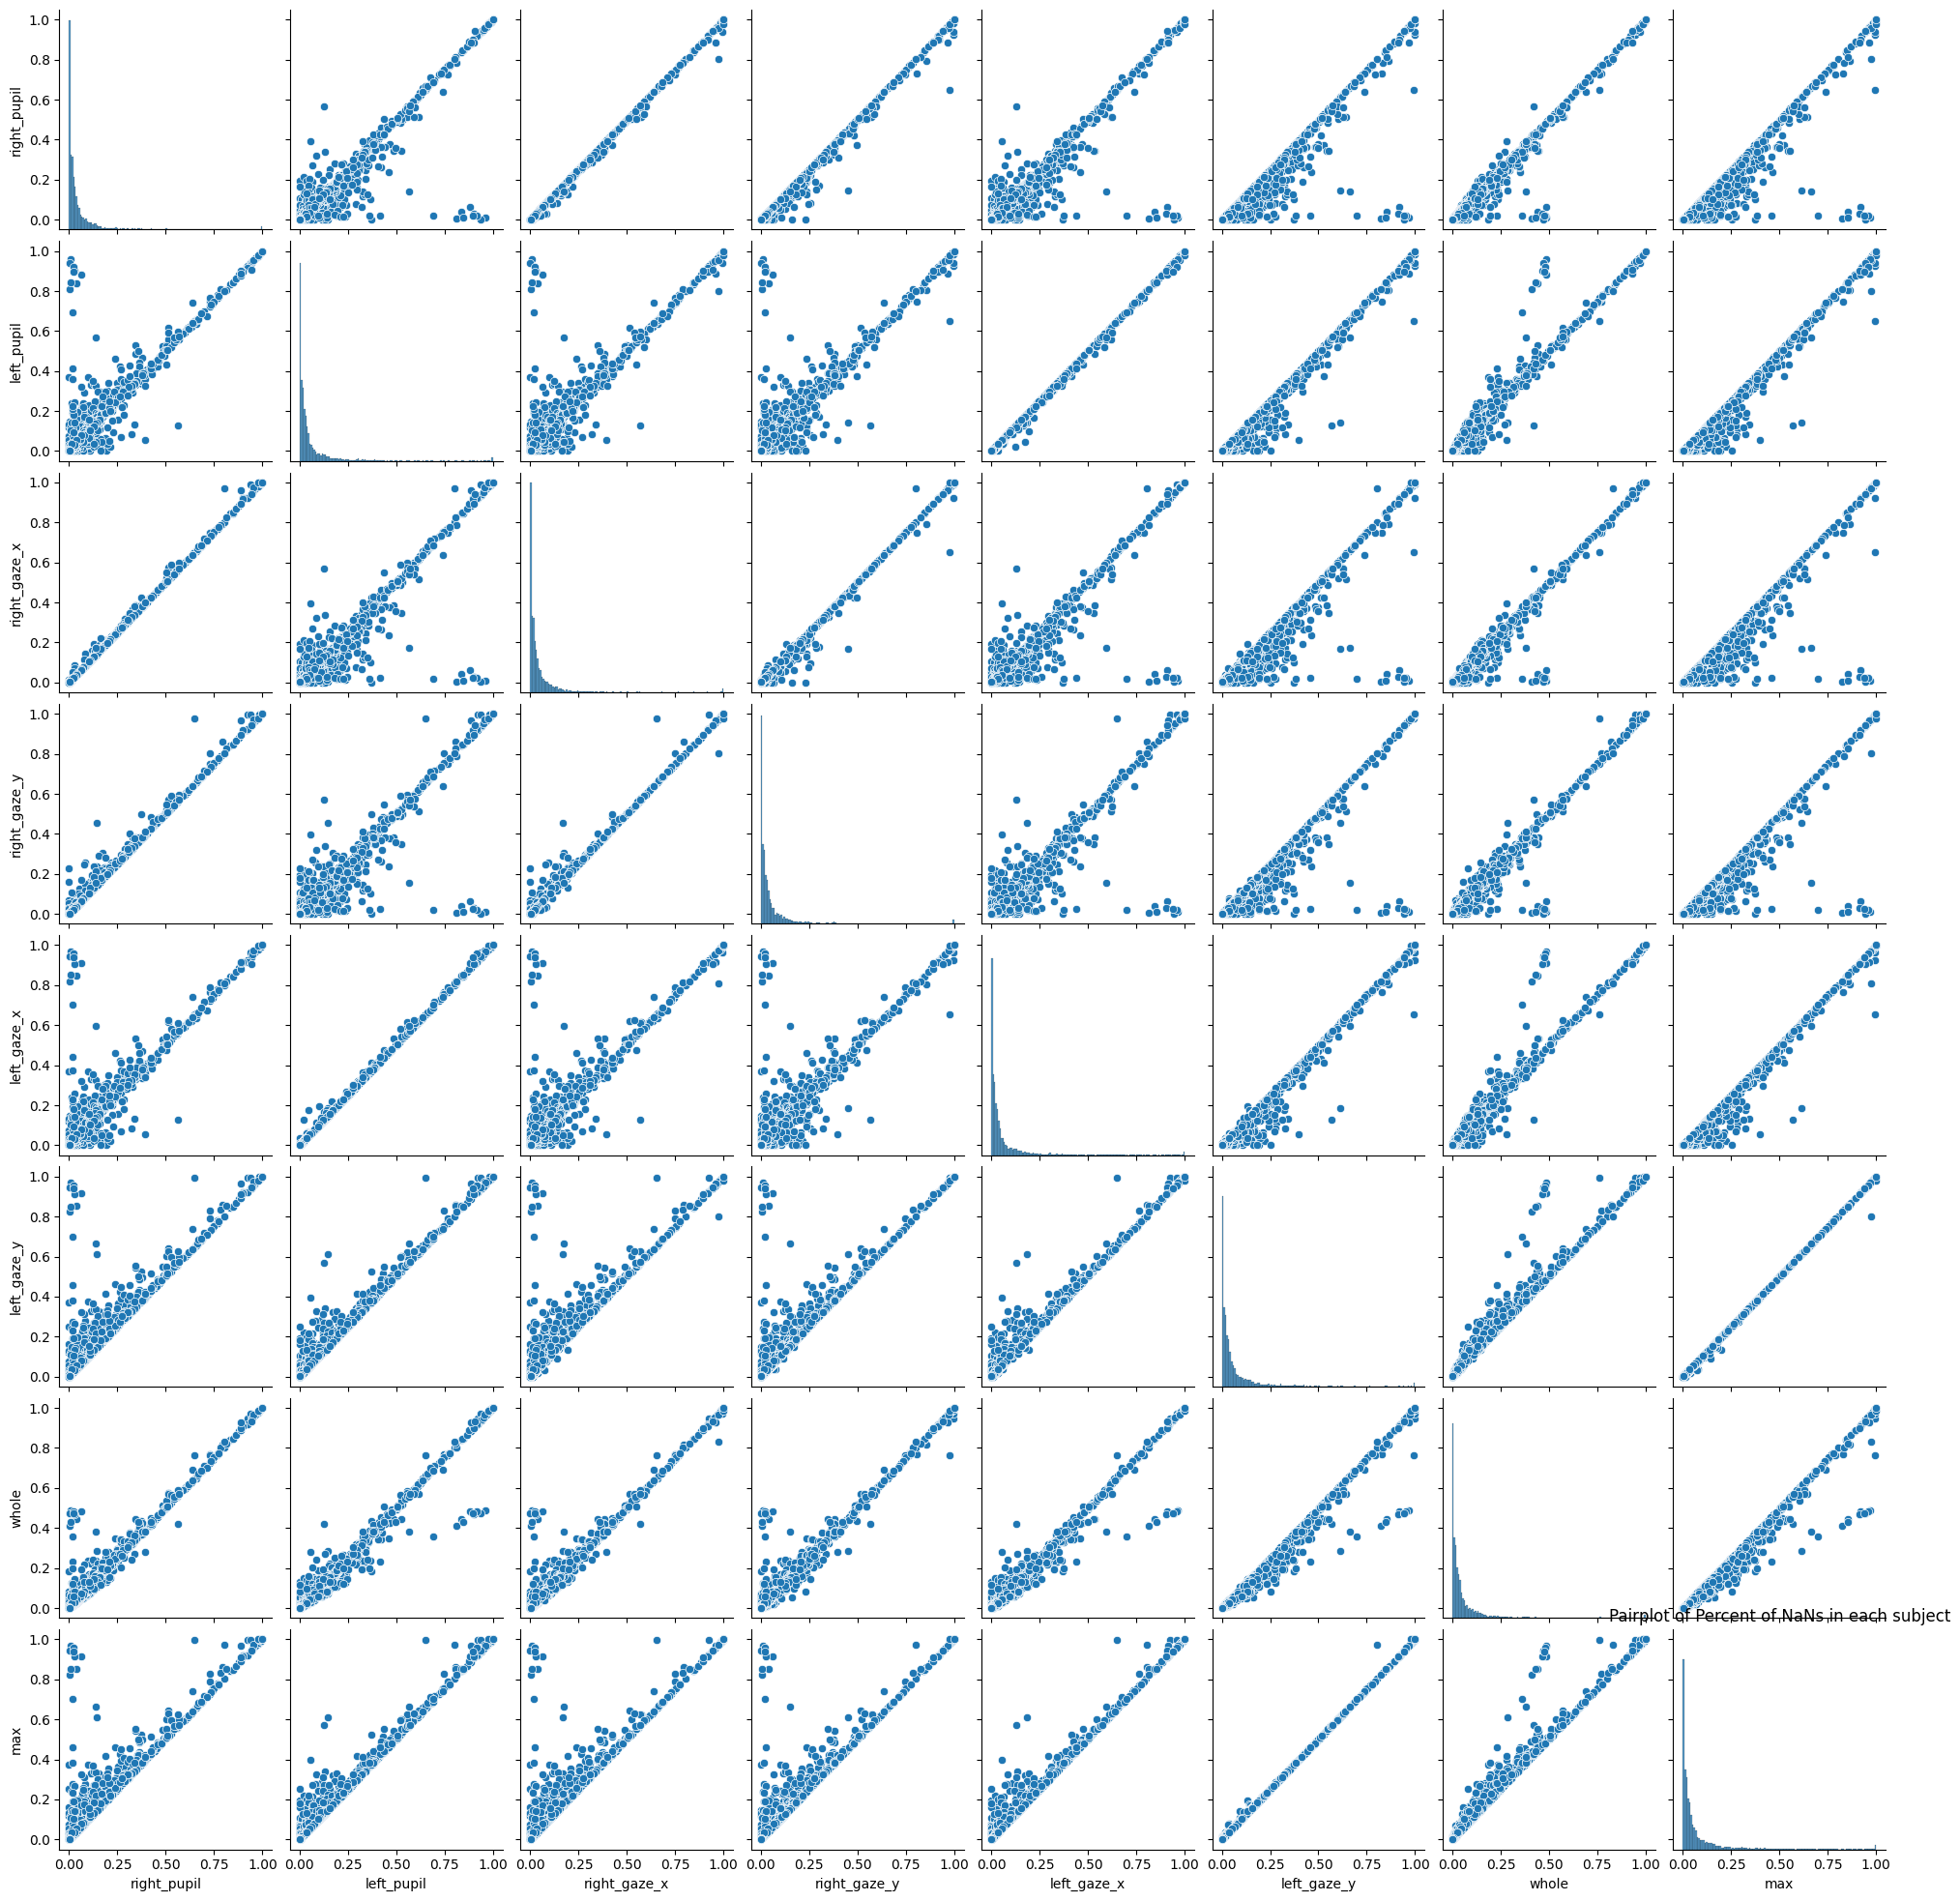

In [4]:
percentnan = nanPercentages(trainingData)
sns.pairplot(percentnan)
plt.title('Pairplot of Percent of NaNs in each subject')
plt.show()

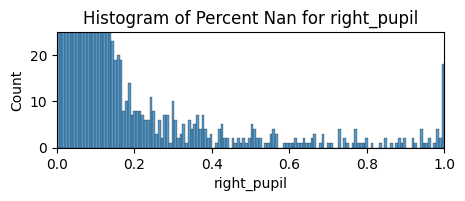

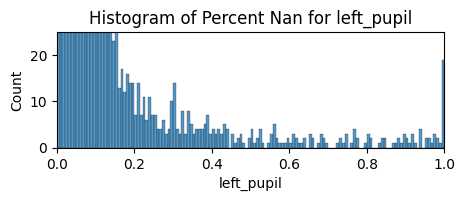

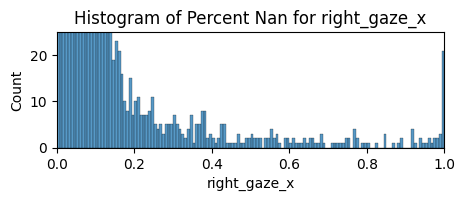

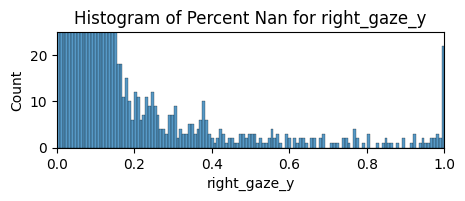

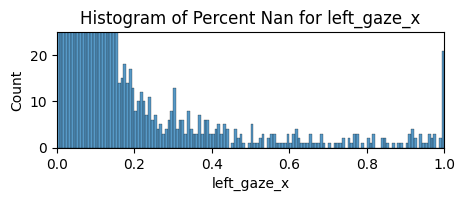

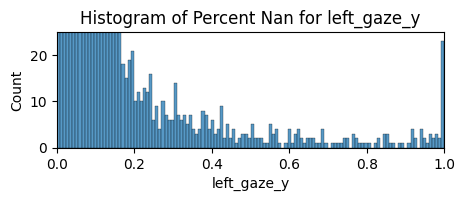

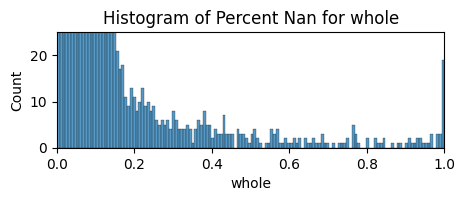

In [5]:
for feature in ['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y', 'whole']:
    plt.figure(figsize=(5, 1.5))
    sns.histplot(data = percentnan[feature])
    plt.title('Histogram of Percent Nan for {}'.format(feature))
    plt.ylim(0, 25)
    plt.xlim(0, 1)
    plt.show()

As seen above there are a non-negligble amount of tests with a high number of NaN values. These tests need to be removed from the data. The following code removes tests with more than 40% NaN values on a feature average and 90% on a feature maximum. This is a very conservative number, but with only 3846 tests remaining from the 4000 we had, we cannot afford to remove too much data.

In [13]:
trainingSubjectInfo['percentNanWhole'] = percentnan['whole']
trainingSubjectInfo['percentNanMax'] = percentnan['max']
nancutSubjectInfo = trainingSubjectInfo.query('percentNanWhole < .4 and percentNanMax < .6')
nancutSubjectInfo

,subject,trial,rt,percentNan,percentNanWhole,percentNanMax
st,,,,,,
"(846, 76)",846,76,451,0.023066,0.023066,0.025442
"(860, 17)",860,17,357,0.015371,0.015371,0.017041
"(874, 63)",874,63,353,0.001360,0.001360,0.002720
"(868, 96)",868,96,365,0.117032,0.117032,0.131010
"(876, 125)",876,125,342,0.105453,0.105453,0.106686
...,...,...,...,...,...,...
"(856, 60)",856,60,317,0.033466,0.033466,0.036928
"(853, 74)",853,74,456,0.059622,0.059622,0.068392
"(860, 7)",860,7,367,0.009875,0.009875,0.018088


In [7]:
nancutData = trainingData.loc[nancutSubjectInfo.index]
nancutData

,subject,time,trial,currentobject,rt,right_pupil,left_pupil,right_gaze_x,right_gaze_y,left_gaze_x,left_gaze_y
st,,,,,,,,,,,
"(846, 76)",846,1130464,76,NaN,1.008899,-0.348967,0.239338,NaN,NaN,-6.444016,NaN
"(846, 76)",846,1130473,76,NaN,1.008899,-0.715814,0.273132,-6.714990,-6.002339,-6.156524,NaN
"(846, 76)",846,1130481,76,Fixation,1.008899,-0.693488,0.211325,NaN,-6.020220,-5.950130,-6.134540
"(846, 76)",846,1130489,76,Fixation,1.008899,-0.406055,0.271155,NaN,NaN,-6.382256,NaN
"(846, 76)",846,1130498,76,Fixation,1.008899,-0.424109,0.256395,NaN,NaN,-6.415913,NaN
...,...,...,...,...,...,...,...,...,...,...,...
"(856, 81)",856,1161446,81,Feedback,-0.075093,0.444170,0.367946,0.170910,-0.355695,2.371392,-0.716843
"(856, 81)",856,1161454,81,Feedback,-0.075093,0.219386,0.241042,0.058251,0.085577,2.251874,-0.528483
"(856, 81)",856,1161463,81,Feedback,-0.075093,0.238748,0.259980,0.138898,-0.027952,2.327763,-0.656482


Now lets look at an example of a single trial. The following code plots the pupilometry data for a single trial.

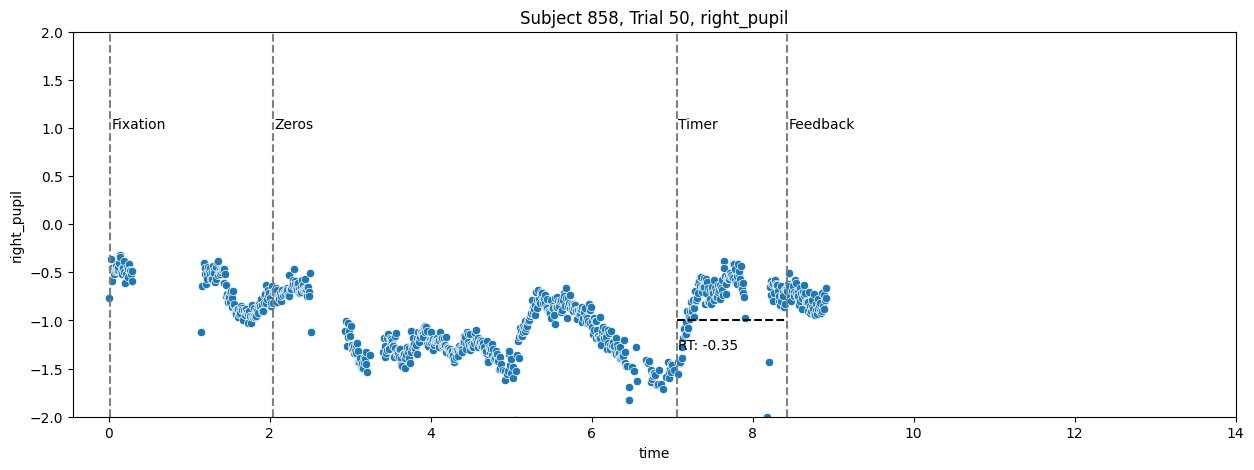

For Subject 858 and Trial 50:
1071 samples in the Zeros phase
Number of Nan Values in the Dataframe
right_pupil     270
left_pupil      295
right_gaze_x    270
right_gaze_y    270
left_gaze_x     295
left_gaze_y     295
dtype: int64


In [8]:
from visualization.visualizations import trialFeatureVisual
tempFrame = trainingData.query('subject == 858 and trial == 50')
tempFrame
trialFeatureVisual(trainingData, 858, 50, 'right_pupil')
print('For Subject 858 and Trial 50:')
print('{} samples in the Zeros phase'.format(tempFrame.shape[0]))
print('Number of Nan Values in the Dataframe')
print(tempFrame[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']].isna().sum())

As shown above, even clean trials still have a lot of nan values. This notebook and the nanHandling.py file include 3 ways to handle the nan values:  
1. Replace all nan values with 0. (the global mean)
2. Replace all nan values with the mean of the trial (zeros phase).
3. Interpolate the nan values.

In [9]:
def nan_to_0(X):
    X = np.array(X)
    X = np.nan_to_num(X, 0)
    return X

def nan_to_avg(X):
    X = np.array(X)
    u = np.nanmean(X)
    X = np.nan_to_num(X, nan=u)
    return X

def nan_to_interp(X):
    X = np.array(X)
    nanmask = ~(np.isnan(X))
    X = np.interp(np.arange(len(X)), np.arange(len(X))[nanmask], X[nanmask])
    return X

different nan handling methods:
Global Average:


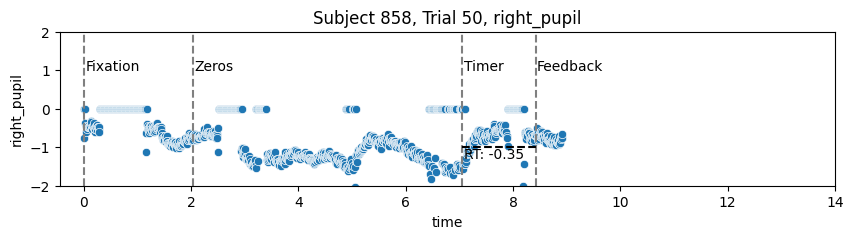

Trial Average:


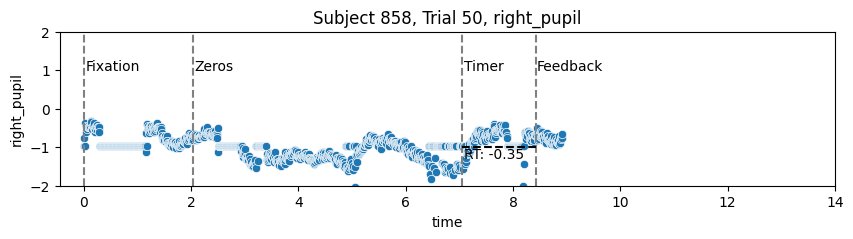

Interpolation:


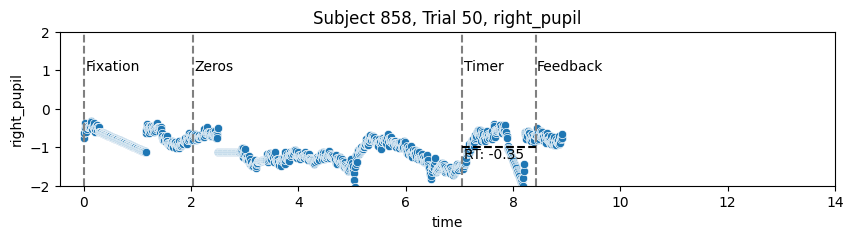

In [10]:
figsize = (10, 2)
print('different nan handling methods:')
print('Global Average:')
nantozeroexample = tempFrame.copy()
nantozeroexample[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']] = nantozeroexample[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']].apply(nan_to_0)
trialFeatureVisual(nantozeroexample, 858, 50, 'right_pupil', figsize=figsize)
print('Trial Average:')
nantoaverageexample = tempFrame.copy()
nantoaverageexample[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']] = nantoaverageexample[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']].apply(nan_to_avg)
trialFeatureVisual(nantoaverageexample, 858, 50, 'right_pupil', figsize=figsize)
print('Interpolation:')
nantointerpexample = tempFrame.copy()
nantointerpexample[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']] = nantointerpexample[['right_pupil', 'left_pupil', 'right_gaze_x', 'right_gaze_y', 'left_gaze_x', 'left_gaze_y']].apply(nan_to_interp)
trialFeatureVisual(nantointerpexample, 858, 50, 'right_pupil', figsize=figsize)